In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from functools import reduce
from sklearn.preprocessing import normalize
import pickle

In [2]:
## Returns True if the arrays representing the two partitions are adjacent by a swap and false otherwise
def is_adjacent_swap(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    if num_diff_1 != 2 or num_diff_2 != 2:
        return False
    else:
        swaps = sum(diff_part1[0] ^ diff_part2[0])
        return swaps == 2 or swaps == (dist_size*2 - 2)   

In [3]:
def adjacent_nodes_swap(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent_swap(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [52]:
## Returns True if the arrays representing the two partitions are adjacent by a recom step
## and false otherwise
def is_adjacent_recom(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    return num_diff_1 == 2 and num_diff_2 == 2

In [5]:
def adjacent_nodes_recom(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent_recom(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [6]:
def plot_partition(part, dim=None, **kwargs):
    if not dim:
        dim = int(np.sqrt(part.shape[0]))
        dim = (dim, dim)
    plan = part.reshape(dim)
    return plt.imshow(plan, **kwargs)

In [7]:
def distance_from_center(graph, n, center):
    center_paths = {k:v for k, v in nx.shortest_path_length(graph, n).items() if k in center}
    return min(center_paths.values())

In [92]:
def write_json(graph, nodes, center, output_file="graph.json"):
    nodes_ls = []
    center = nx.center(graph)
    for node in graph.nodes():
        d = {"node": node, "neighbors": list(nx.neighbors(graph,node)),
             "partition": str(nodes[node]),
             "degree": nx.degree(graph, node), 
             "distance_from_center": distance_from_center(graph, node, center)}
        nodes_ls.append(d)

    edge_ls = []
    for (n1, n2) in graph.edges():
        edge_ls.append({"from": str(nodes[n1]), "to": str(nodes[n2])})
    
    d_graph = {"nodes": nodes_ls, "edges": edge_ls}
   
    with open(output_file, 'w') as outfile:
        json.dump(d_graph, outfile, indent=2)

## 3x3 -> 3

In [54]:
with open("enums/enum_[3,3]_[3]_3_rc.txt") as file:
    nodes={}
    for i, line in enumerate(file):
        nodes[i] = np.fromstring(line, dtype=int, sep=',')

In [55]:
graph_swap = nx.Graph()
graph_swap.add_edges_from(adjacent_nodes_swap(nodes))

In [56]:
graph_recom = nx.Graph()
graph_recom.add_edges_from(adjacent_nodes_recom(nodes))

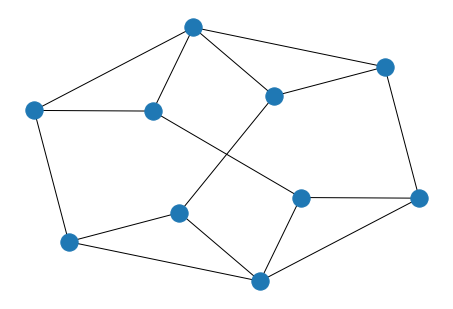

In [57]:
nx.draw_kamada_kawai(graph_swap)

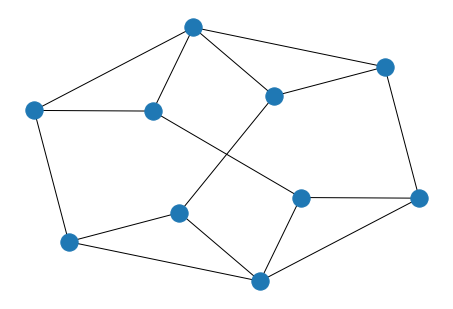

In [58]:
nx.draw_kamada_kawai(graph_recom)

In [59]:
nx.graph_clique_number(graph_recom)

3

In [67]:
nx.graph_number_of_cliques(graph_recom)

8

In [62]:
[k for k in nx.find_cliques(graph_recom)]

[[1, 0, 2], [1, 9, 5], [3, 8, 4], [3, 2], [4, 5], [6, 8, 7], [6, 9], [7, 0]]

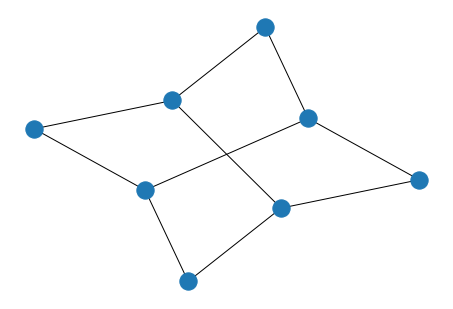

In [66]:
nx.draw_kamada_kawai(nx.make_max_clique_graph(graph_recom))

In [46]:
degrees = list(map(lambda n: nx.degree(graph,n), graph.nodes()))

In [47]:
print("Max Degree:", max(degrees))
print("Mim Degree:", min(degrees))

Max Degree: 4
Mim Degree: 3


In [48]:
nx.radius(graph)

3

In [49]:
nx.diameter(graph)

3

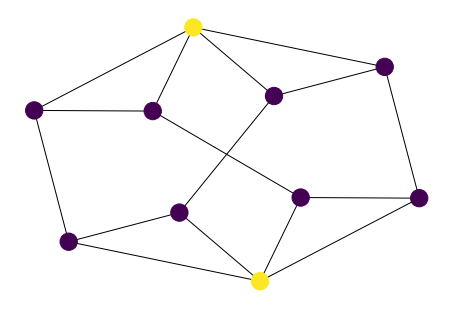

In [52]:
nx.draw_kamada_kawai(graph, node_color=degrees)

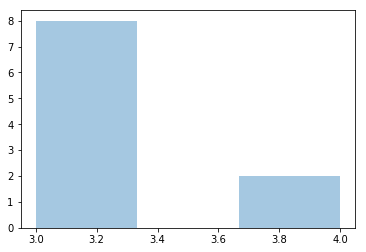

In [53]:
sns.distplot(degrees, kde=False)

### 4x4 -> 4

In [22]:
with open("enums/enum_[4,4]_[4]_4_rc.txt") as file:
    nodes_4_4={}
    for i, line in enumerate(file):
        nodes_4_4[i] = np.fromstring(line, dtype=int, sep=',')   

In [23]:
edges_4_4_swap = adjacent_nodes_swap(nodes_4_4)
edges_4_4_recom = adjacent_nodes_recom(nodes_4_4)

In [24]:
graph_4_4_swap = nx.Graph()
graph_4_4_swap.add_edges_from(edges_4_4_swap)

graph_4_4_recom = nx.Graph()
graph_4_4_recom.add_edges_from(edges_4_4_recom)

In [25]:
print("# nodes:", len(nodes_4_4))
print("# edges (swap):", len(graph_4_4_swap.edges()))
print("# edges (recom):", len(graph_4_4_recom.edges()))

# nodes: 117
# edges (swap): 260
# edges (recom): 372


In [26]:
degrees_4_4_swap = list(map(lambda n: nx.degree(graph_4_4_swap,n), graph_4_4_swap.nodes()))
degrees_4_4_recom = list(map(lambda n: nx.degree(graph_4_4_recom,n), graph_4_4_recom.nodes()))

In [27]:
print("Max Degree (swap):", max(degrees_4_4_swap))
print("Min Degree (swap):", min(degrees_4_4_swap))
print("Max Degree (recom):", max(degrees_4_4_recom))
print("Min Degree (recom):", min(degrees_4_4_recom))

Max Degree (swap): 8
Min Degree (swap): 3
Max Degree (recom): 12
Min Degree (recom): 4


In [28]:
print("Radius (swap):", nx.radius(graph_4_4_swap))
print("Diameter (swap):", nx.diameter(graph_4_4_swap))
print("#Centers (swap):", len(nx.center(graph_4_4_swap)))

print("Radius (recom):", nx.radius(graph_4_4_recom))
print("Diameter (recom):", nx.diameter(graph_4_4_recom))
print("#Centers (recom):", len(nx.center(graph_4_4_recom)))

Radius (swap): 6
Diameter (swap): 8
#Centers (swap): 36
Radius (recom): 5
Diameter (recom): 6
#Centers (recom): 97


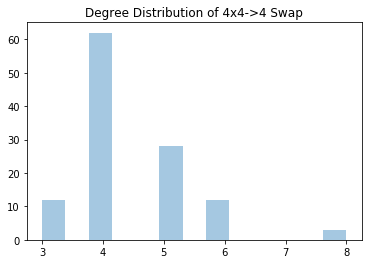

In [29]:
plt.figure()
plt.title("Degree Distribution of 4x4->4 Swap")
sns.distplot(degrees_4_4_swap, kde=False)
plt.show()
# plt.savefig("plots/swap_4_4_4_degree_distribution.png")

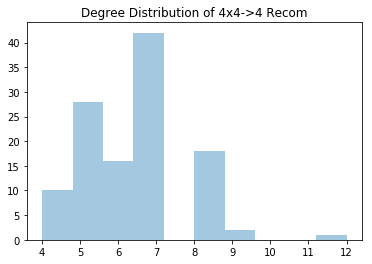

In [30]:
plt.figure()
plt.title("Degree Distribution of 4x4->4 Recom")
sns.distplot(degrees_4_4_recom, kde=False)
plt.show()
# plt.savefig("plots/recom_4_4_4_degree_distribution.png")

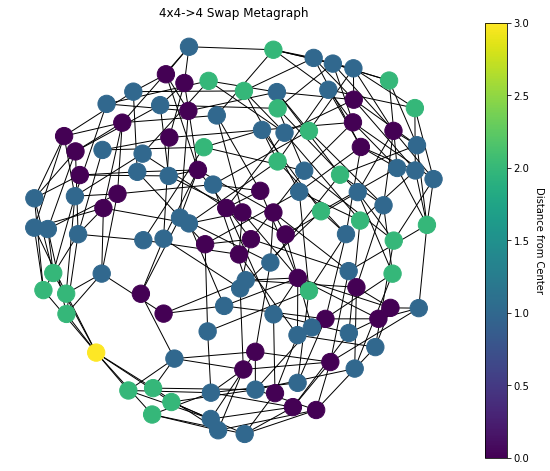

In [31]:
plt.figure(figsize=(10,8))
plt.title("4x4->4 Swap Metagraph")
center_4_4 = nx.center(graph_4_4_swap)
distances = [distance_from_center(graph_4_4_swap, n, center_4_4) for n in graph_4_4_swap.nodes()]
nx.draw_kamada_kawai(graph_4_4_swap,
                     node_color=distances)

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(distances),vmax=max(distances)))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Distance from Center", rotation=-90, va="bottom")
plt.show()

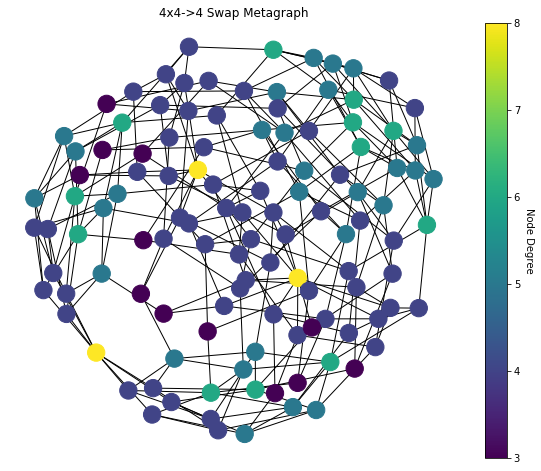

In [32]:
plt.figure(figsize=(10,8))
plt.title("4x4->4 Swap Metagraph")
nx.draw_kamada_kawai(graph_4_4_swap,
                     node_color=[nx.degree(graph_4_4_swap,n) for n in graph_4_4_swap.nodes()])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 3,vmax=8))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

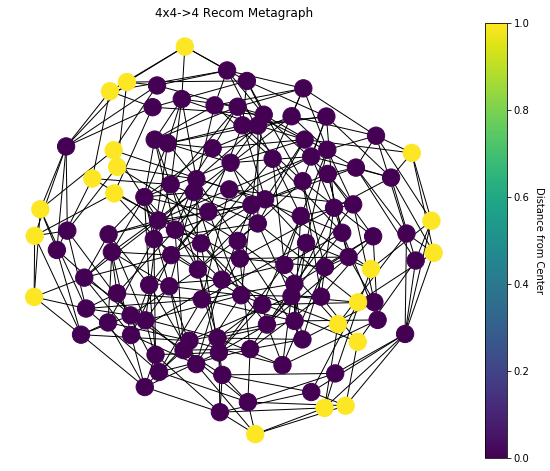

In [33]:
plt.figure(figsize=(10,8))
plt.title("4x4->4 Recom Metagraph")
center_4_4 = nx.center(graph_4_4_recom)
distances = [distance_from_center(graph_4_4_recom, n, center_4_4) for n in graph_4_4_recom.nodes()]
nx.draw_kamada_kawai(graph_4_4_recom,
                     node_color=distances)

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(distances),vmax=max(distances)))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Distance from Center", rotation=-90, va="bottom")
plt.show()

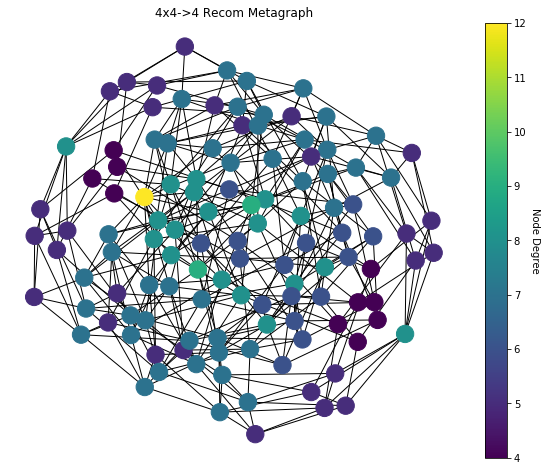

In [34]:
plt.figure(figsize=(10,8))
plt.title("4x4->4 Recom Metagraph")
nx.draw_kamada_kawai(graph_4_4_recom,
                     node_color=[nx.degree(graph_4_4_recom,n) for n in graph_4_4_recom.nodes()])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 4,vmax=12))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

In [69]:
nx.graph_clique_number(graph_4_4_recom)

4

In [72]:
cliques = [k for k in nx.find_cliques(graph_4_4_recom)]

In [74]:
cliques_4 = list(filter(lambda ls: len(ls) == 4, cliques))
cliques_3 = list(filter(lambda ls: len(ls) == 3, cliques))
cliques_2 = list(filter(lambda ls: len(ls) == 2, cliques))

In [77]:
print("# 2 cliques:", len(cliques_2))
print("# 3 cliques:", len(cliques_3))
print("# 4 cliques:", len(cliques_4))

# 2 cliques: 72
# 3 cliques: 32
# 4 cliques: 34


In [84]:
cliques

[[0, 73, 7],
 [0, 1, 2],
 [0, 88],
 [1, 48, 29, 86],
 [1, 74, 15],
 [2, 75, 26],
 [2, 78],
 [3, 42, 93],
 [3, 4, 5],
 [3, 28],
 [4, 64, 51, 116],
 [4, 100, 44],
 [5, 109, 46],
 [5, 70],
 [6, 72],
 [6, 17, 11],
 [6, 7],
 [7, 26, 15],
 [8, 9, 10, 11],
 [8, 113],
 [8, 21, 25, 27],
 [8, 89],
 [9, 16, 14, 23],
 [9, 90],
 [10, 91],
 [10, 22],
 [10, 111],
 [11, 92],
 [12, 35, 41],
 [12, 13, 14],
 [12, 15, 20, 22],
 [13, 36, 42],
 [13, 28],
 [14, 43, 37],
 [16, 18],
 [16, 50],
 [17, 18, 19, 20],
 [17, 68, 58, 52],
 [19, 70, 60, 54],
 [19, 27, 28],
 [20, 71, 61, 55],
 [21, 82],
 [21, 114],
 [21, 22],
 [22, 112],
 [22, 83],
 [23, 80],
 [23, 24, 25, 26],
 [24, 81],
 [24, 18],
 [25, 115],
 [27, 116],
 [29, 33, 35, 38],
 [29, 30],
 [30, 32, 34, 31],
 [30, 95, 78, 47],
 [31, 96, 49, 79],
 [31, 39, 40],
 [32, 97, 80, 50],
 [32, 37],
 [33, 34],
 [33, 55],
 [35, 36, 37],
 [36, 40],
 [38, 112, 57, 84],
 [38, 39],
 [39, 67, 114, 85],
 [40, 44],
 [41, 42, 43],
 [41, 45],
 [42, 44, 46],
 [43, 94],
 [45, 46

## 4x4 ->2

Metagraph for 4x4 recom is $K_{70}$

In [9]:
with open("enums/enum_[4,4]_[8]_2_rc.txt") as file:
    nodes_4_4_2={}
    for i, line in enumerate(file):
        nodes_4_4_2[i] = np.fromstring(line, dtype=int, sep=',')

In [10]:
edges_4_4_2_swap = adjacent_nodes_swap(nodes_4_4_2)
edges_4_4_2_recom = adjacent_nodes_recom(nodes_4_4_2)

In [11]:
graph_4_4_2_swap = nx.Graph()
graph_4_4_2_swap.add_edges_from(edges_4_4_2_swap)

graph_4_4_2_recom = nx.Graph()
graph_4_4_2_recom.add_edges_from(edges_4_4_2_recom)

In [12]:
print("# nodes:", len(nodes_4_4_2))
print("# edges (swap):", len(graph_4_4_2_swap.edges()))
print("# edges (recom):", len(graph_4_4_2_recom.edges()))

# nodes: 70
# edges (swap): 328
# edges (recom): 2415


In [15]:
degrees_4_4_2_swap = list(map(lambda n: nx.degree(graph_4_4_2_swap,n), graph_4_4_2_swap.nodes()))
degrees_4_4_2_recom = list(map(lambda n: nx.degree(graph_4_4_2_recom,n), graph_4_4_2_recom.nodes()))
print("Max Degree (swap):", max(degrees_4_4_2_swap))
print("Min Degree (swap):", min(degrees_4_4_2_swap))
print("Max Degree (recom):", max(degrees_4_4_2_recom))
print("Min Degree (recom):", min(degrees_4_4_2_recom))

Max Degree (swap): 12
Min Degree (swap): 7
Max Degree (recom): 69
Min Degree (recom): 69


In [17]:
print("Radius (swap):", nx.radius(graph_4_4_2_swap))
print("Diameter (swap):", nx.diameter(graph_4_4_2_swap))
print("#Centers (swap):", len(nx.center(graph_4_4_2_swap)))

print("Radius (recom):", nx.radius(graph_4_4_2_recom))
print("Diameter (recom):", nx.diameter(graph_4_4_2_recom))
print("#Centers (recom):", len(nx.center(graph_4_4_2_recom)))

Radius (swap): 4
Diameter (swap): 5
#Centers (swap): 62
Radius (recom): 1
Diameter (recom): 1
#Centers (recom): 70


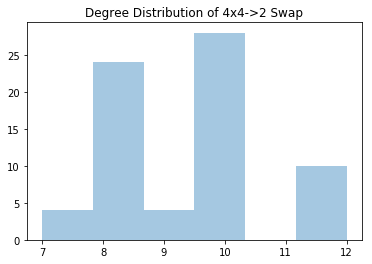

In [18]:
plt.figure()
plt.title("Degree Distribution of 4x4->2 Swap")
sns.distplot(degrees_4_4_2_swap, kde=False)
plt.show()
# plt.savefig("plots/swap_4_4_4_degree_distribution.png")

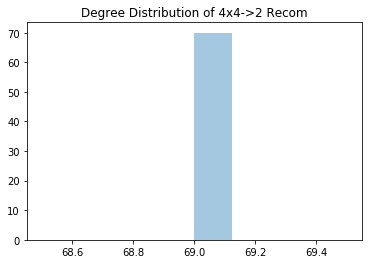

In [19]:
plt.figure()
plt.title("Degree Distribution of 4x4->2 Recom")
sns.distplot(degrees_4_4_2_recom, kde=False)
plt.show()
# plt.savefig("plots/swap_4_4_4_degree_distribution.png")

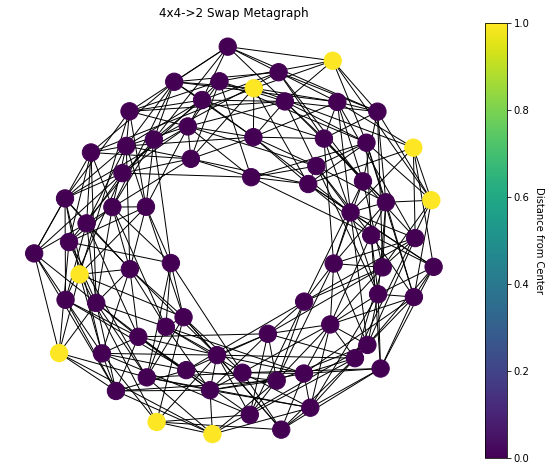

In [36]:
plt.figure(figsize=(10,8))
plt.title("4x4->2 Swap Metagraph")
center_4_4_2 = nx.center(graph_4_4_2_swap)
distances = [distance_from_center(graph_4_4_2_swap, n, center_4_4_2) for n in graph_4_4_2_swap.nodes()]
nx.draw_kamada_kawai(graph_4_4_2_swap,
                     node_color=distances)

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(distances),vmax=max(distances)))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Distance from Center", rotation=-90, va="bottom")
plt.show()

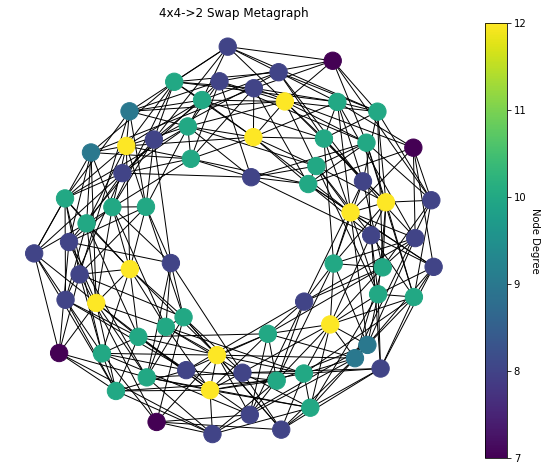

In [38]:
plt.figure(figsize=(10,8))
plt.title("4x4->2 Swap Metagraph")
nx.draw_kamada_kawai(graph_4_4_2_swap,
                     node_color=[nx.degree(graph_4_4_2_swap,n) for n in graph_4_4_2_swap.nodes()])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 7,vmax=12))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

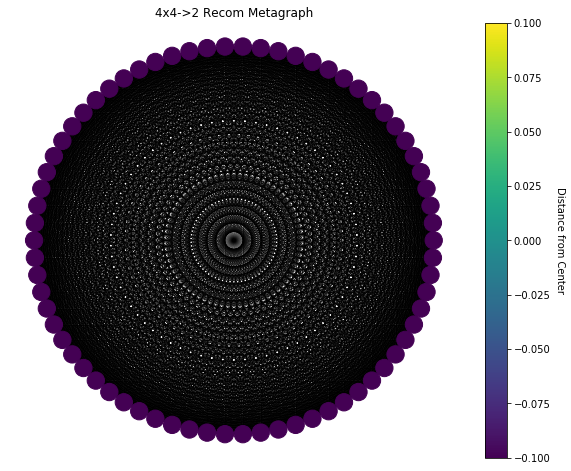

In [46]:
plt.figure(figsize=(10,8))
plt.title("4x4->2 Recom Metagraph")
center_4_4_2 = nx.center(graph_4_4_2_recom)
distances = [distance_from_center(graph_4_4_2_recom, n, center_4_4_2) for n in graph_4_4_2_recom.nodes()]
nx.draw_kamada_kawai(graph_4_4_2_recom,
                     node_color=distances, width=0.5)

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0,vmax=0))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Distance from Center", rotation=-90, va="bottom")
plt.show()

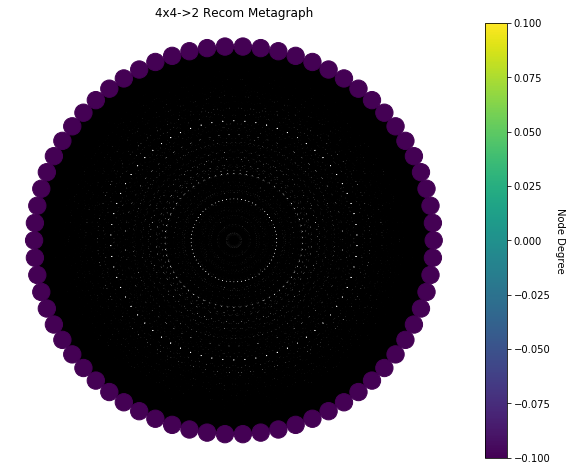

In [45]:
plt.figure(figsize=(10,8))
plt.title("4x4->2 Recom Metagraph")
nx.draw_kamada_kawai(graph_4_4_2_recom,
                     node_color=[nx.degree(graph_4_4_2_recom,n) for n in graph_4_4_2_recom.nodes()])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 0,vmax=0))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

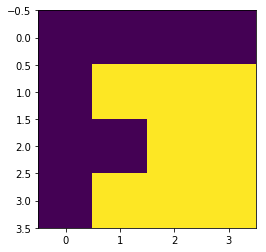

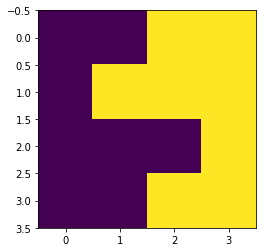

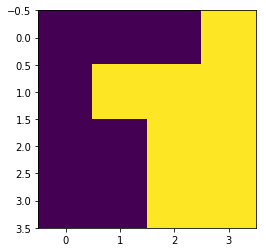

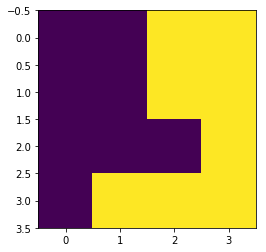

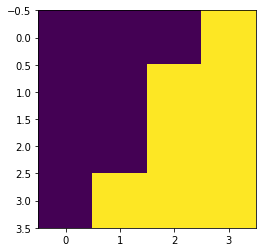

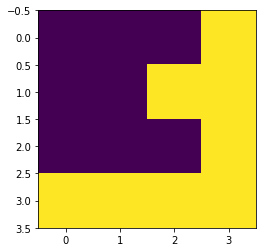

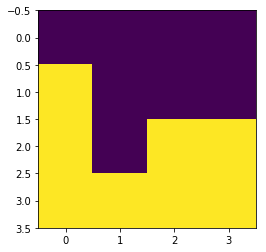

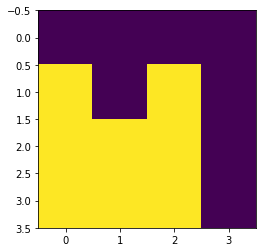

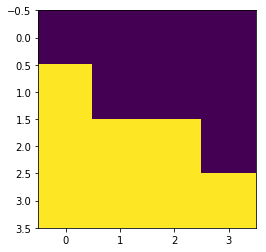

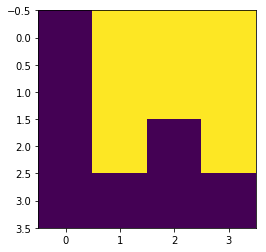

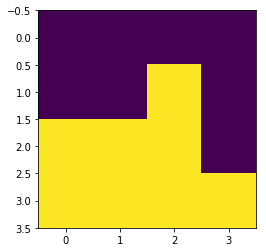

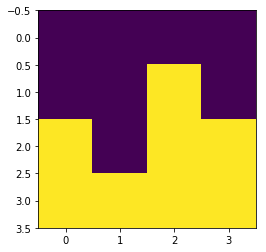

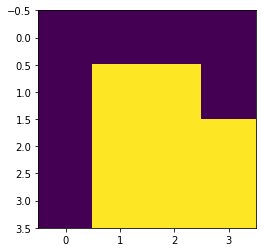

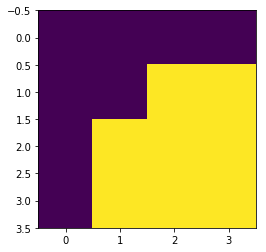

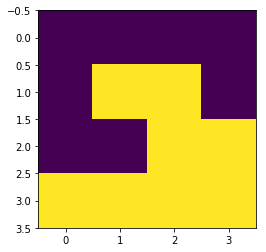

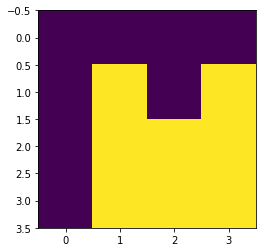

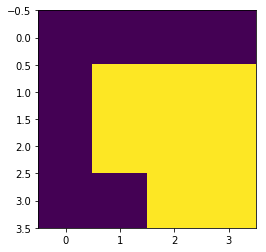

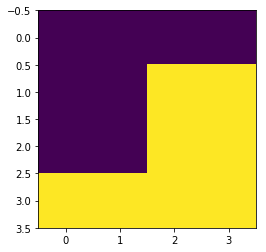

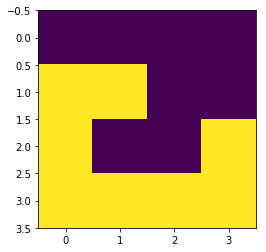

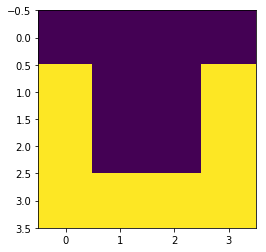

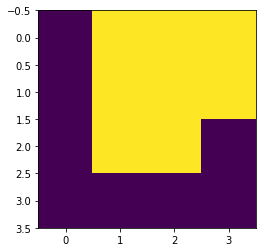

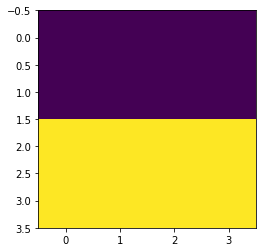

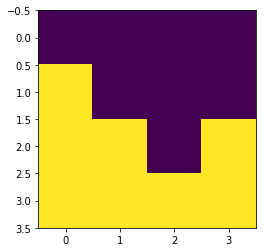

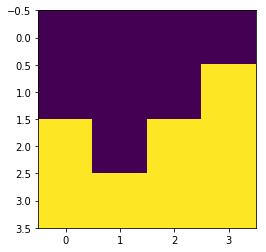

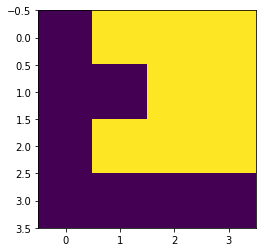

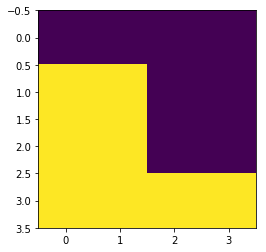

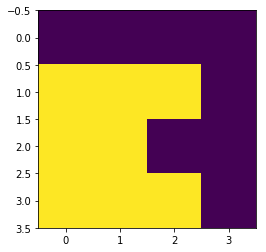

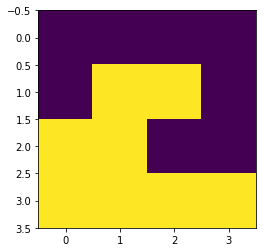

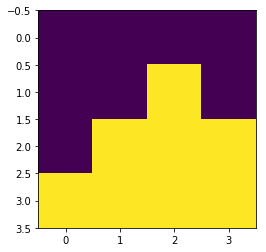

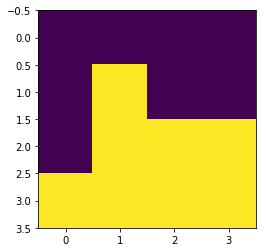

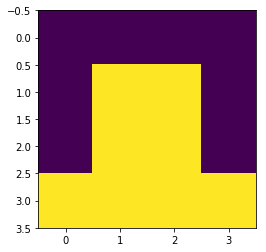

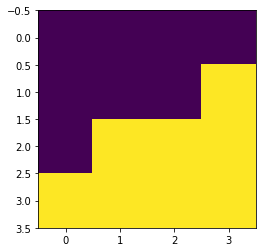

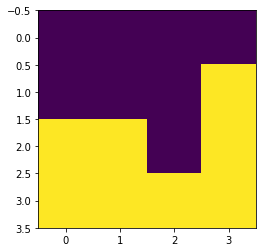

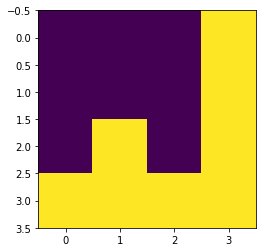

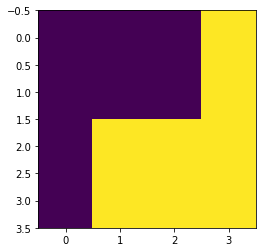

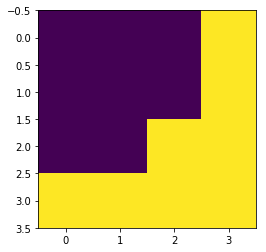

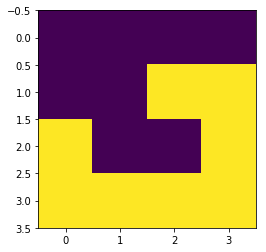

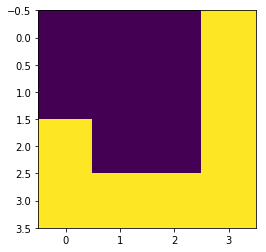

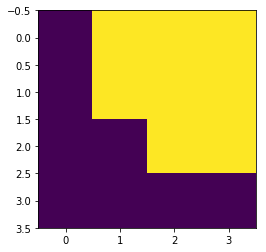

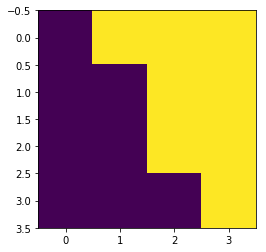

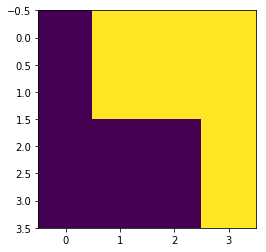

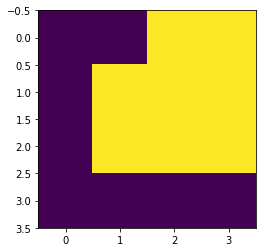

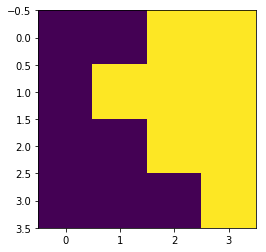

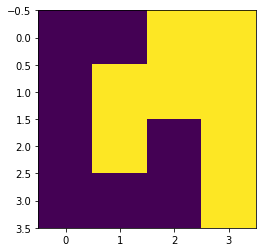

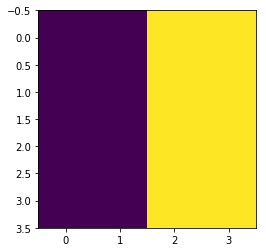

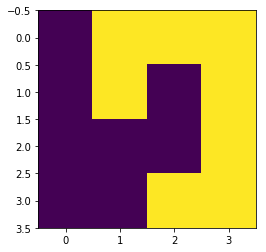

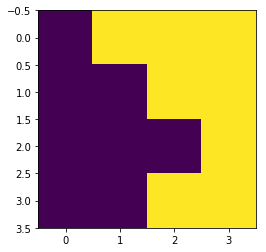

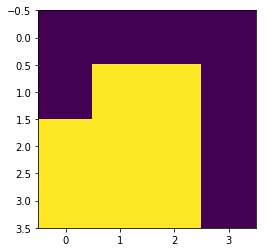

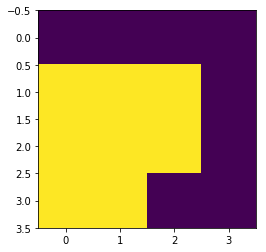

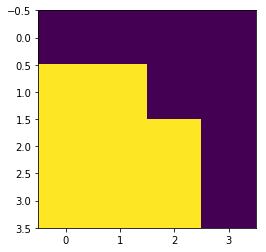

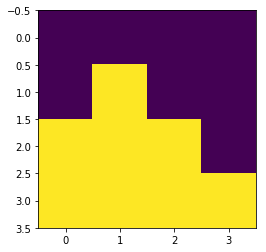

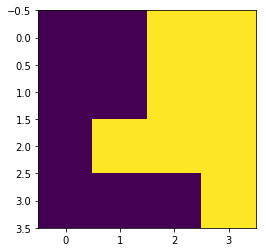

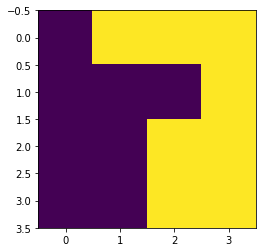

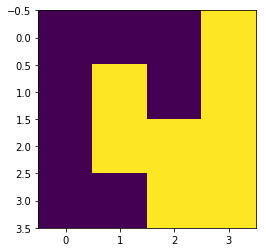

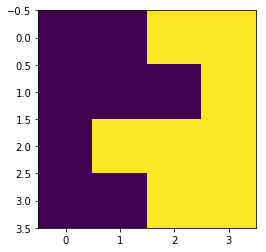

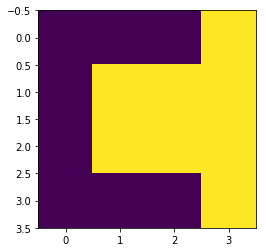

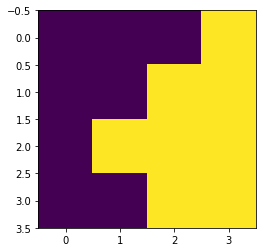

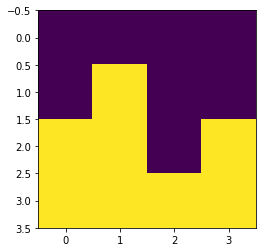

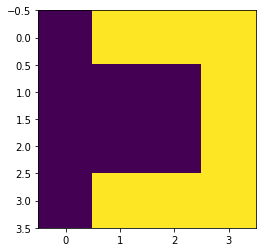

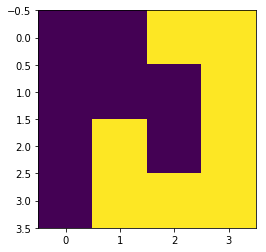

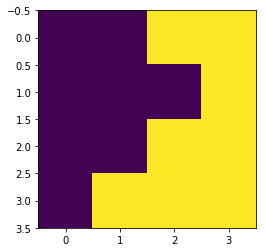

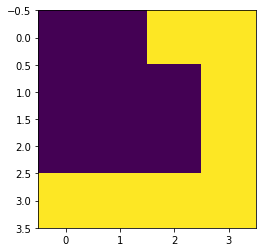

In [119]:
for node in center_4_4_2:
    plot_partition(nodes_4_4_2[node])
    plt.show()

### 4x4->8

In [99]:
with open("enums/enum_[4,4]_[2]_8_rc.txt") as file:
    nodes_4_4_8={}
    for i, line in enumerate(file):
        nodes_4_4_8[i] = np.fromstring(line, dtype=int, sep=',')

In [101]:
edges_4_4_8 = adjacent_nodes_swap(nodes_4_4_8)
graph_4_4_8 = nx.Graph()
graph_4_4_8.add_edges_from(edges_4_4_8)

In [32]:
print("# edges:", len(edges_4_4_8))
print("# nodes:", len(graph_4_4_8.nodes))

# edges: 70
# nodes: 36


In [33]:
degrees_4_4_8 = list(map(lambda n: nx.degree(graph_4_4_8,n), graph_4_4_8.nodes()))
print("Max Degree:", max(degrees_4_4_8))
print("Min Degree:", min(degrees_4_4_8))

Max Degree: 6
Min Degree: 1


In [34]:
print("Radius:", nx.radius(graph_4_4_8))
print("Diameter:", nx.diameter(graph_4_4_8))
print("#Centers:", len(nx.center(graph_4_4_8)))

Radius: 5
Diameter: 10
#Centers: 6


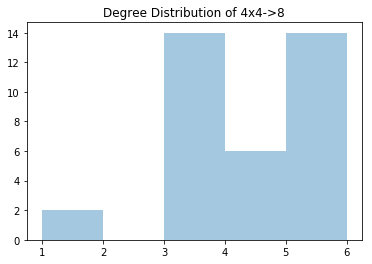

In [74]:
plt.figure()
plt.title("Degree Distribution of 4x4->8")
sns.distplot(degrees_4_4_8, kde=False)
plt.show()

In [35]:
pi_4_4_8 = normalize(np.array([degrees_4_4_8]), norm="l1")

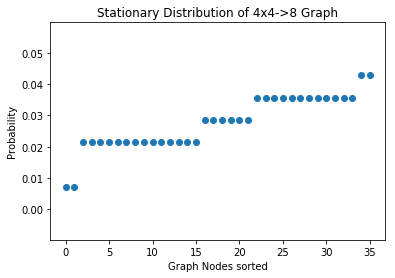

In [36]:
num_edges = len(edges_4_4_8)
plt.title("Stationary Distribution of 4x4->8 Graph")
plt.xlabel("Graph Nodes sorted")
plt.ylabel("Probability")
plt.scatter(y=sorted(pi_4_4_8.flatten()), x=sorted(graph_4_4_8.nodes()))
plt.show()

In [37]:
def symmetries(n, dim=None):
    if not dim:
        dim = int(np.sqrt(part.shape[0]))
        dim = (dim, dim)
    n.reshape(dim)
    sym_funs = [lambda n: n, lambda n: np.rot90(n),
                lambda n: np.rot90(n, k=2), lambda n: np.rot90(n, k=3),
                lambda n: np.fliplr(n), lambda n: np.fliplr(np.rot90(n)),
                lambda n: np.fliplr(np.rot90(n, k=3)), lambda n: np.fliplr(np.rot90(n, k=3))]

    return list(map(lambda f: f(n).flatten(), sym_funs))

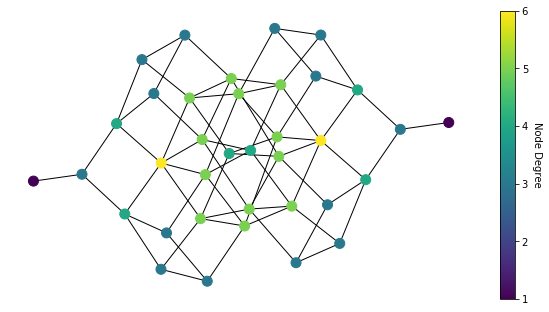

In [38]:
plt.figure(figsize=(8,4))
nx.draw_kamada_kawai(graph_4_4_8,
                     node_color=[nx.degree(graph_4_4_8,n) for n in graph_4_4_8.nodes()],
                     node_size=100)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 6,vmax=1))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

In [39]:
center_4_4_8 = nx.center(graph_4_4_8)

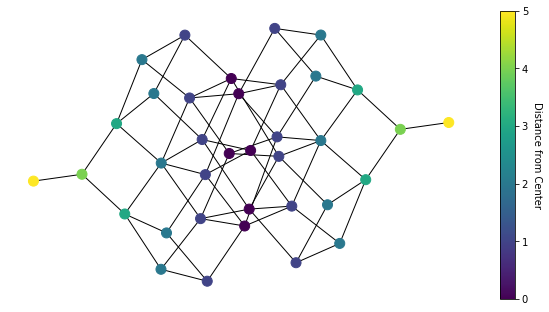

In [87]:
plt.figure(figsize=(8,4))
center_4_4_8 = nx.center(graph_4_4_8)
nx.draw_kamada_kawai(graph_4_4_8,
        node_color=[distance_from_center(graph_4_4_8, n, center_4_4_8) for n in graph_4_4_8.nodes()],
                    node_size=100)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0,vmax=nx.radius(graph_4_4_8)))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Distance from Center", rotation=-90, va="bottom")
plt.show()

### 5x5->5

In [47]:
with open("enums/enum_[5,5]_[5]_5_rc.txt") as file:
    nodes_5_5={}
    for i, line in enumerate(file):
        nodes_5_5[i] = np.fromstring(line, dtype=int, sep=',')

In [50]:
edges_5_5_recom = adjacent_nodes_recom(nodes_5_5)

KeyboardInterrupt: 

In [49]:
graph_5_5_swap = pickle.load(open("graph_5_5_5.p", "rb"))

In [79]:
print("# edges:", len(graph_5_5.edges()))
print("# nodes:", len(graph_5_5.nodes))

# edges: 13416
# nodes: 4006


In [80]:
degrees_5_5 = list(map(lambda n: nx.degree(graph_5_5,n), graph_5_5.nodes()))
print("Max Degree:", max(degrees_5_5))
print("Min Degree:", min(degrees_5_5))

Max Degree: 13
Min Degree: 1


In [81]:
print("Radius:", nx.radius(graph_5_5))
print("Diameter:", nx.diameter(graph_5_5))
center_5_5 = nx.center(graph_5_5)
print("#Centers:", len(center_5_5))

Radius: 11
Diameter: 14
#Centers: 136


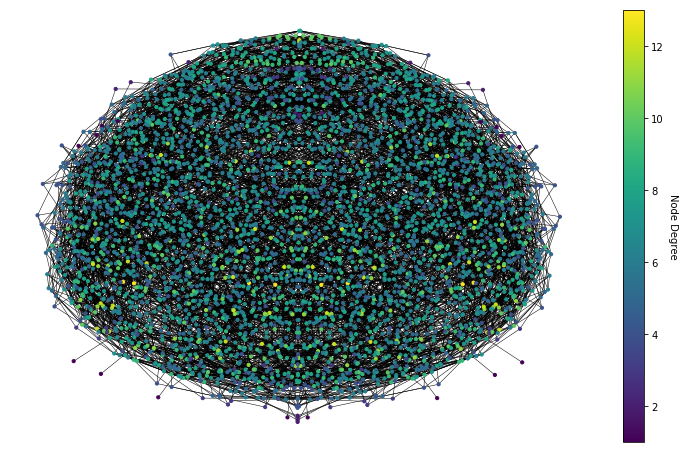

In [88]:
plt.figure(figsize=(10,6))
nx.draw_kamada_kawai(graph_5_5,
                     node_color=[nx.degree(graph_5_5,n) for n in graph_5_5.nodes()],
                     node_size=10,
                     width=0.5)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 13,vmax=1))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

### Scratchwork

In [ ]:
for i, node in enumerate(nodes_5_5):
    plot_partition(nodes_5_5[node])
    plt.savefig(f"plots/partitions/5_5_5/5_5_5_part_{i}.png")

KeyboardInterrupt: 

In [94]:
nx.to_dict_of_lists(graph)

{0: [1, 2, 7],
 1: [0, 2, 5, 9],
 2: [0, 1, 3],
 7: [0, 6, 8],
 5: [1, 4, 9],
 9: [1, 5, 6],
 3: [2, 4, 8],
 4: [3, 5, 8],
 8: [3, 4, 6, 7],
 6: [7, 8, 9]}

In [183]:
center= nx.center(graph)
one_away = reduce(lambda s, n: s | set(nx.neighbors(graph,n)),center, set())
one_away = one_away - set(center)

In [93]:
write_json(graph_swap, nodes, nx.center(graph_swap), "json_graphs/3_3_3_graph.json")

In [95]:
write_json(graph_4_4_swap, nodes_4_4, nx.center(graph_4_4_swap), "json_graphs/4_4_4_graph_swap.json")

In [96]:
write_json(graph_4_4_2_swap, nodes_4_4_2, nx.center(graph_4_4_2_swap), "json_graphs/4_4_2_graph_swap.json")

In [102]:
write_json(graph_4_4_8, nodes_4_4_8, nx.center(graph_4_4_8), "json_graphs/4_4_8_graph.json")